<a href="https://colab.research.google.com/github/tjallard/Covid/blob/main/COVID19_NC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Loading Libraries, data, and Google Functions

In [ ]:
# Import Libraries
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import io
import matplotlib as mpl
import seaborn as sns

# It is a function that renders the figure in a notebook (instead of displaying a dump of the figure object).
%matplotlib inline

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [ ]:
# Adds functionality for accessing file on Google Drive
#https://pypi.org/project/PyDrive/
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# Authenticate users to have acces to google Drive.  Click the link to get the code. 
# A seperate Google Window will open in your browser to authenticate.  
# Copy code the very long code and paste it into the Colab. Hit enter.  

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# This mounts your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load data from Google Drive
df = pd.read_csv('/content/drive/MyDrive/COVID_Study/COVID_Data/NC_Z4_19_20_2022May26.csv')

# Summary of the data

In [ ]:
# Verify the data
df

,ZIP_CODE,ZIP4,20_CRRTTYPE,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,...,19_PCTBLPOP,19_PCTHISPOP,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,MEDHHINC,MEDAGHHER
0,27006,1,B,96.1,37.6,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
1,27006,121,B,58.0,22.7,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
2,27006,201,B,81.2,31.7,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
3,27006,316,B,77.9,30.4,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
4,27006,476,B,77.9,30.4,3.44,2.56,55.1,833,273458,...,2.74,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563433,30559,2385,R,2.6,1.1,7.75,2.26,60.4,228,130226,...,0.96,1.86,94.22,9.67,20.30,5.66,30.7,3761.1,57335,60.1
1563434,30559,3096,R,2.3,1.0,13.13,2.36,59.7,293,165705,...,0.44,0.90,96.88,4.04,17.35,7.36,41.6,3826.5,55070,59.0
1563435,30559,9000,R,1.9,0.8,12.37,2.32,61.8,689,152497,...,0.73,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8
1563436,30559,9200,R,1.9,0.8,12.37,2.32,61.8,689,152497,...,0.73,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8


In [ ]:
# Check shape of dataframe
df.shape

(1563438, 39)

In [ ]:
# Add prefix 19_ to columns MEDHHINC, MEDAGHHER to keep naming consistent
df.rename(columns={"MEDHHINC":"19_MEDHHINC", "MEDAGHHER":"19_MEDAGHHER"}, inplace = True)

In [ ]:
# Verify Rename
df.columns

Index(['ZIP_CODE', 'ZIP4', '20_CRRTTYPE', '20_POP20', '20_HH20',
       '20_POPGROW20', '20_AVGHHSIZE', '20_MEDAGHHER', '20_MEDRENT',
       '20_MEDVALOCC', '20_MEDVEHICLE', '20_MEDHHINC', '20_AVGHHINC',
       '20_PERCAPINC', '20_MEDAGE', '20_PCTHH200P', '20_HHHINCAVG',
       'Right_ZIP_CODE', 'Right_ZIP4', 'STAABBRV', 'LAT', 'LONG', '19_POP19',
       '19_HH19', '19_POPGROW19', '19_MEDVEHICLE', '19_MEDAGE', '19_PCTOOHH',
       '19_PCTWHPOP', '19_PCTBLPOP', '19_PCTHISPOP', '19_PCTWNHPOP',
       '19_PCTGRADDEG', '19_PCTWHCOL', '19_PCTSPARC', '19_CASH_EDU',
       '19_HEALTHINS', '19_MEDHHINC', '19_MEDAGHHER'],
      dtype='object')

In [ ]:
# Verify that the columns 'ZIP_CODE' and 'Right_ZIP_CODE' are equal
df['ZIP_CODE'].equals(df['Right_ZIP_CODE']) 

True

In [ ]:
# Verify that the columns 'ZIP4' and 'Right_ZIP4' are equal
df['ZIP4'].equals(df['Right_ZIP4']) 

True

In [ ]:
# Drop Columns that are redundant or not needed 
df.drop(['Right_ZIP_CODE', 'Right_ZIP4', 'STAABBRV', 'LAT', 'LONG', '20_CRRTTYPE'], axis=1, inplace=True);

In [ ]:
# Verify dropped columns
df.shape

(1563438, 33)

In [ ]:
# Check data types
df.dtypes

ZIP_CODE           int64
ZIP4               int64
20_POP20         float64
20_HH20          float64
20_POPGROW20     float64
20_AVGHHSIZE     float64
20_MEDAGHHER     float64
20_MEDRENT         int64
20_MEDVALOCC       int64
20_MEDVEHICLE    float64
20_MEDHHINC        int64
20_AVGHHINC        int64
20_PERCAPINC       int64
20_MEDAGE        float64
20_PCTHH200P     float64
20_HHHINCAVG       int64
19_POP19         float64
19_HH19          float64
19_POPGROW19     float64
19_MEDVEHICLE    float64
19_MEDAGE        float64
19_PCTOOHH       float64
19_PCTWHPOP      float64
19_PCTBLPOP      float64
19_PCTHISPOP     float64
19_PCTWNHPOP     float64
19_PCTGRADDEG    float64
19_PCTWHCOL      float64
19_PCTSPARC      float64
19_CASH_EDU      float64
19_HEALTHINS     float64
19_MEDHHINC        int64
19_MEDAGHHER     float64
dtype: object

# NULLS and Missing Values Treatment

In [ ]:
# Verify Number of entries
len(df)

1563438

In [ ]:
#Drop any 19_POP19 row that has a 0 population
df = df[df['19_POP19'] != 0]

In [ ]:
# Verify '19_POP19' dropped values
len(df)

1524026

In [ ]:
#Drop any '20_POP20' row that has a 0 population
df = df[df['20_POP20'] != 0]

In [ ]:
# Verify '20_POP20' dropped values
len(df)

1523845

In [ ]:
# Rows before dropping zeros and rows after dropping zeros (better way to do this?)
# Total Rows before droping zeros = 1563438
# After dropping 2019 zeros = 1524026/1563438
# After dropping 2020 zeros = 1523845/1563438
lostrows = (1523845/1563438) * 100 - 100
lostrows

-2.5324317305834967

In [ ]:
# Lost rows from zeros in 2019
lostrows2019 = (1524026/1563438) * 100 - 100
lostrows2019

-2.520854680518198

In [ ]:
# Lost rows from zeros in 2020
lostrows2020 = (1523845/1563438) * 100 - 100
lostrows2020

-2.5324317305834967

In [ ]:
# Check for any Null missing values
df.isnull().sum().sum()

0

In [ ]:
# Check location of Null missing values
df.isnull().any()

ZIP_CODE         False
ZIP4             False
20_POP20         False
20_HH20          False
20_POPGROW20     False
20_AVGHHSIZE     False
20_MEDAGHHER     False
20_MEDRENT       False
20_MEDVALOCC     False
20_MEDVEHICLE    False
20_MEDHHINC      False
20_AVGHHINC      False
20_PERCAPINC     False
20_MEDAGE        False
20_PCTHH200P     False
20_HHHINCAVG     False
19_POP19         False
19_HH19          False
19_POPGROW19     False
19_MEDVEHICLE    False
19_MEDAGE        False
19_PCTOOHH       False
19_PCTWHPOP      False
19_PCTBLPOP      False
19_PCTHISPOP     False
19_PCTWNHPOP     False
19_PCTGRADDEG    False
19_PCTWHCOL      False
19_PCTSPARC      False
19_CASH_EDU      False
19_HEALTHINS     False
19_MEDHHINC      False
19_MEDAGHHER     False
dtype: bool

In [ ]:
# Check rows for objects with the value of 'NaN'
df.eq('NaN', axis=0).sum().sum()

0

In [ ]:
# Check rows for objects with the value of 'nan'
df.eq('nan', axis=0).sum().sum()

0

In [ ]:
# Check rows for opbjects with the value of 'NA'
df.eq('n/a', axis=0).sum().sum()

0

# Create Dependent Variable

In [ ]:
# Create Dependent Variable (DV) - Difference between Median Houshold Income from 2019 to 2020 as a percentage
# Finding the Dependent Variable (DV): Overview (2020-2019)/2019

df['MEDHHINC_DIFF_RAW'] = df['20_MEDHHINC'] - df['19_MEDHHINC']
df['MEDHHINC_DIFF_PCT'] = df['MEDHHINC_DIFF_RAW']/df['19_MEDHHINC']
df['MEDHHINC_DIFF_PCT']

0          0.002956
1          0.002956
2          0.002956
3          0.002956
4          0.002956
             ...   
1563433    0.014197
1563434    0.011277
1563435    0.007609
1563436    0.007609
1563437    0.007609
Name: MEDHHINC_DIFF_PCT, Length: 1523845, dtype: float64

In [ ]:
# Check for infinity values in the DV
count = np.isinf(df['MEDHHINC_DIFF_PCT']).values.sum()
count

129

In [ ]:
# Convert infinity values to NULL Values 
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# Check for nulls in the DV
df.isnull().sum()

ZIP_CODE               0
ZIP4                   0
20_POP20               0
20_HH20                0
20_POPGROW20           0
20_AVGHHSIZE           0
20_MEDAGHHER           0
20_MEDRENT             0
20_MEDVALOCC           0
20_MEDVEHICLE          0
20_MEDHHINC            0
20_AVGHHINC            0
20_PERCAPINC           0
20_MEDAGE              0
20_PCTHH200P           0
20_HHHINCAVG           0
19_POP19               0
19_HH19                0
19_POPGROW19           0
19_MEDVEHICLE          0
19_MEDAGE              0
19_PCTOOHH             0
19_PCTWHPOP            0
19_PCTBLPOP            0
19_PCTHISPOP           0
19_PCTWNHPOP           0
19_PCTGRADDEG          0
19_PCTWHCOL            0
19_PCTSPARC            0
19_CASH_EDU            0
19_HEALTHINS           0
19_MEDHHINC            0
19_MEDAGHHER           0
MEDHHINC_DIFF_RAW      0
MEDHHINC_DIFF_PCT    129
FULL_ZIP               0
dtype: int64

In [ ]:
# Drop Nulls in the DV
df.dropna(axis = 0, how = 'any', inplace=True)

In [ ]:
# Verify nulls were dropped
df.isnull().sum().sum()

0

In [ ]:
# # Round the 'MEDHHINC_DIFF_PCT' to 6 decimals https://datatofish.com/round-values-pandas-dataframe/
# df['MEDHHINC_DIFF_PCT'].round(decimals = 6)

0          0.002956
1          0.002956
2          0.002956
3          0.002956
4          0.002956
             ...   
1563433    0.014197
1563434    0.011277
1563435    0.007609
1563436    0.007609
1563437    0.007609
Name: MEDHHINC_DIFF_PCT, Length: 1523020, dtype: float64

# Transforming with Zip Codes

In [ ]:
# Verify column data types
df.dtypes

ZIP_CODE              object
ZIP4                  object
20_POP20             float64
20_HH20              float64
20_POPGROW20         float64
20_AVGHHSIZE         float64
20_MEDAGHHER         float64
20_MEDRENT             int64
20_MEDVALOCC           int64
20_MEDVEHICLE        float64
20_MEDHHINC            int64
20_AVGHHINC            int64
20_PERCAPINC           int64
20_MEDAGE            float64
20_PCTHH200P         float64
20_HHHINCAVG           int64
19_POP19             float64
19_HH19              float64
19_POPGROW19         float64
19_MEDVEHICLE        float64
19_MEDAGE            float64
19_PCTOOHH           float64
19_PCTWHPOP          float64
19_PCTBLPOP          float64
19_PCTHISPOP         float64
19_PCTWNHPOP         float64
19_PCTGRADDEG        float64
19_PCTWHCOL          float64
19_PCTSPARC          float64
19_CASH_EDU          float64
19_HEALTHINS         float64
19_MEDHHINC            int64
19_MEDAGHHER         float64
MEDHHINC_DIFF_RAW      int64
MEDHHINC_DIFF_

In [ ]:
# Convert 'ZIP_CODE' and 'ZIP4' from int64 to string
df['ZIP_CODE'] = df['ZIP_CODE'].astype(str)
df['ZIP4'] = df['ZIP4'].astype(str)

In [ ]:
# Have all variables in ZIP_CODE have 5 numbers (insert zeros where needed)
df['ZIP_CODE'] = df.ZIP_CODE.str.pad(5,side='left', fillchar = '0')

In [ ]:
# Have all variables in ZIP4 have 4 numbers (insert zeros where needed)
df['ZIP4'] = df.ZIP4.str.pad(4,side='left', fillchar = '0')
df

,ZIP_CODE,ZIP4,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,...,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT,FULL_ZIP
0,27006,0001,96.1,37.6,3.44,2.56,55.1,833,273458,2.6,...,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956,270060001
1,27006,0121,58.0,22.7,3.44,2.56,55.1,833,273458,2.6,...,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956,270060121
2,27006,0201,81.2,31.7,3.44,2.56,55.1,833,273458,2.6,...,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956,270060201
3,27006,0316,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,...,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956,270060316
4,27006,0476,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,...,23.26,43.95,7.50,83.9,4165.7,112300,54.1,332,0.002956,270060476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563433,30559,2385,2.6,1.1,7.75,2.26,60.4,228,130226,2.4,...,9.67,20.30,5.66,30.7,3761.1,57335,60.1,814,0.014197,305592385
1563434,30559,3096,2.3,1.0,13.13,2.36,59.7,293,165705,2.6,...,4.04,17.35,7.36,41.6,3826.5,55070,59.0,621,0.011277,305593096
1563435,30559,9000,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,...,8.24,21.25,5.23,34.6,3726.1,41924,60.8,319,0.007609,305599000
1563436,30559,9200,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,...,8.24,21.25,5.23,34.6,3726.1,41924,60.8,319,0.007609,305599200


In [ ]:
# Concatenate 'ZIP_CODE' and 'ZIP_4' into column named 'FULL_ZIP'
df['FULL_ZIP'] = df['ZIP_CODE'] + df['ZIP4']
df.dtypes

ZIP_CODE              object
ZIP4                  object
20_POP20             float64
20_HH20              float64
20_POPGROW20         float64
20_AVGHHSIZE         float64
20_MEDAGHHER         float64
20_MEDRENT             int64
20_MEDVALOCC           int64
20_MEDVEHICLE        float64
20_MEDHHINC            int64
20_AVGHHINC            int64
20_PERCAPINC           int64
20_MEDAGE            float64
20_PCTHH200P         float64
20_HHHINCAVG           int64
19_POP19             float64
19_HH19              float64
19_POPGROW19         float64
19_MEDVEHICLE        float64
19_MEDAGE            float64
19_PCTOOHH           float64
19_PCTWHPOP          float64
19_PCTBLPOP          float64
19_PCTHISPOP         float64
19_PCTWNHPOP         float64
19_PCTGRADDEG        float64
19_PCTWHCOL          float64
19_PCTSPARC          float64
19_CASH_EDU          float64
19_HEALTHINS         float64
19_MEDHHINC            int64
19_MEDAGHHER         float64
MEDHHINC_DIFF_RAW      int64
MEDHHINC_DIFF_

# EDA - Exploratory Data Analysis

In [ ]:
# Descriptive Statistics with all nulls and zeros removed. Removed scientific notation to 2 decimal points.
df.describe().apply(lambda s: s.apply('{0:.2f}'.format))

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
count,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,...,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00,1522891.00
mean,6.84,2.72,9.32,2.43,52.60,605.10,163693.97,2.28,65300.51,80908.73,...,63.51,8.62,29.89,12.00,37.23,3394.28,64937.32,51.83,363.18,0.01
std,7.86,2.30,10.67,0.31,6.54,263.29,96937.39,0.33,29192.95,35207.34,...,25.60,8.51,11.91,5.95,22.85,492.45,29012.73,6.41,1903.76,0.03
min,0.10,0.00,-50.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,1617.10,11625.00,16.00,-122071.00,-1.00
25%,3.30,1.40,0.55,2.26,49.90,424.00,99796.00,2.10,46355.00,59262.00,...,46.97,2.78,21.46,8.05,23.80,3091.20,46134.00,49.20,71.00,0.00
50%,5.60,2.20,8.46,2.44,53.80,566.00,139519.00,2.30,59936.00,72981.00,...,69.33,6.02,27.68,11.00,32.90,3480.50,59563.00,52.90,362.00,0.01
75%,8.70,3.50,18.97,2.61,56.60,734.00,197582.00,2.50,76976.00,93013.00,...,84.90,11.77,36.88,14.82,43.40,3740.10,76637.00,55.80,635.00,0.01
max,5679.00,155.40,42.10,5.35,85.10,2184.00,1174799.00,3.20,346088.00,517611.00,...,100.00,60.61,71.80,65.86,247.30,4822.80,347011.00,84.60,147734.00,3.21


In [ ]:
# Explore coorelations with Pearson standard correlation coefficient.
df.corr()

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,MEDHHINC_DIFF_RAW,MEDHHINC_DIFF_PCT
20_POP20,1.000000,0.738973,0.167190,0.169656,-0.187598,0.201772,0.089439,0.019668,0.165027,0.134233,...,-0.040293,0.096882,0.176454,0.010358,0.118261,0.027659,0.164504,-0.186290,0.023587,0.008774
20_HH20,0.738973,1.000000,0.210609,0.080951,-0.223684,0.260592,0.137752,-0.011742,0.197737,0.167210,...,-0.023737,0.159461,0.268850,-0.024351,0.144299,0.034248,0.197344,-0.221707,0.024700,0.006994
20_POPGROW20,0.167190,0.210609,1.000000,0.114125,-0.365373,0.518829,0.416824,-0.028794,0.390353,0.359061,...,0.016047,0.335878,0.501895,-0.148928,0.334103,0.125074,0.389352,-0.360184,0.052197,0.022702
20_AVGHHSIZE,0.169656,0.080951,0.114125,1.000000,-0.115758,0.025020,-0.116879,0.348524,0.192831,0.105045,...,-0.188534,-0.201192,-0.043755,0.318061,0.123826,0.111282,0.190806,-0.119221,0.049124,0.027768
20_MEDAGHHER,-0.187598,-0.223684,-0.365373,-0.115758,1.000000,-0.280389,-0.046330,0.215168,-0.028874,0.013102,...,0.315167,-0.153928,-0.332436,-0.186650,0.040498,0.385700,-0.028730,0.995603,-0.004918,-0.006920
20_MEDRENT,0.201772,0.260592,0.518829,0.025020,-0.280389,1.000000,0.576288,0.060173,0.600090,0.580958,...,0.139665,0.535810,0.587258,-0.335576,0.546722,0.287004,0.599172,-0.271847,0.070796,0.016945
20_MEDVALOCC,0.089439,0.137752,0.416824,-0.116879,-0.046330,0.576288,1.000000,0.160196,0.727752,0.792234,...,0.400526,0.724475,0.610598,-0.551727,0.778046,0.517647,0.727817,-0.034633,0.067900,0.003939
20_MEDVEHICLE,0.019668,-0.011742,-0.028794,0.348524,0.215168,0.060173,0.160196,1.000000,0.419561,0.364705,...,0.526714,0.020018,0.181405,-0.423624,0.396581,0.672616,0.418531,0.218535,0.055416,0.013257
20_MEDHHINC,0.165027,0.197737,0.390353,0.192831,-0.028874,0.600090,0.727752,0.419561,1.000000,0.929933,...,0.402419,0.622205,0.708903,-0.533615,0.897542,0.691333,0.997880,-0.017862,0.126981,0.034230
20_AVGHHINC,0.134233,0.167210,0.359061,0.105045,0.013102,0.580958,0.792234,0.364705,0.929933,1.000000,...,0.415513,0.675332,0.684195,-0.554223,0.911433,0.675856,0.929264,0.024133,0.098230,0.013451


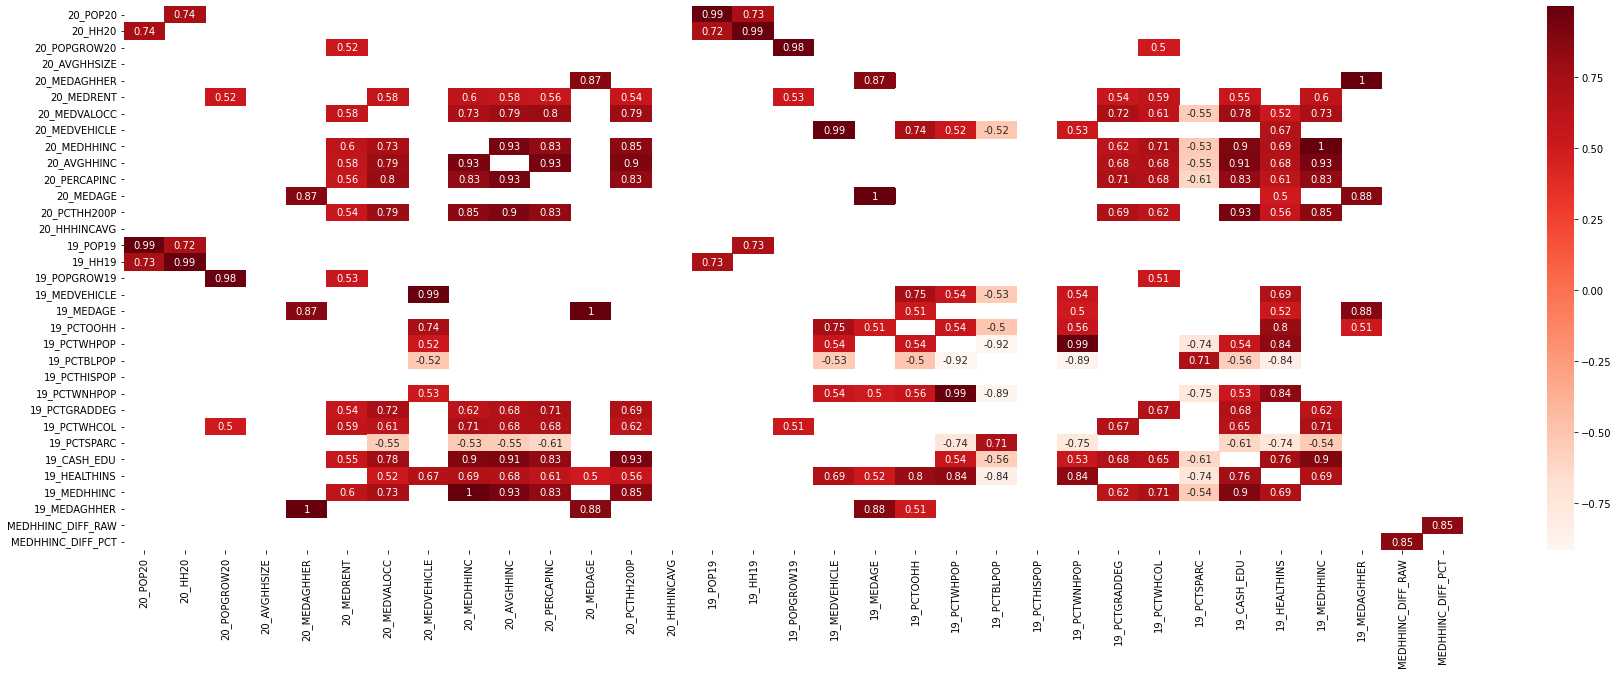

In [ ]:
dfCorr = df.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(30,10))
sns.heatmap(filteredDf, annot=True, cmap="Reds")
plt.show()

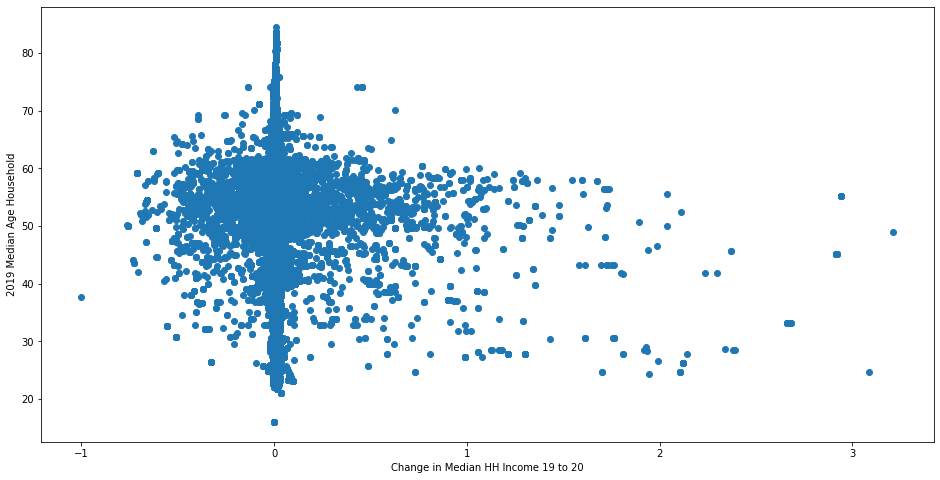

In [ ]:
#Scatter Plot - Population Growth vs. Change in HH Income from 19 to 20
import matplotlib. pyplot as plt 
fig, ax = plt.subplots(figsize = (16, 8))
ax.scatter(df['MEDHHINC_DIFF_PCT'], df['19_MEDAGHHER'])
ax.set_xlabel('Change in Median HH Income 19 to 20')
ax.set_ylabel('2019 Median Age Household')
plt.show()

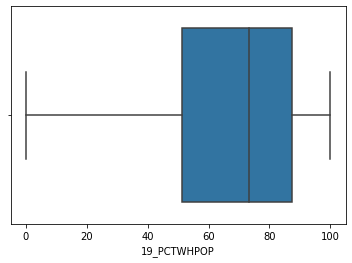

In [ ]:
#Outliers - 2019 White People Population
sns.boxplot(x=df['19_PCTWHPOP'])
plt.show()

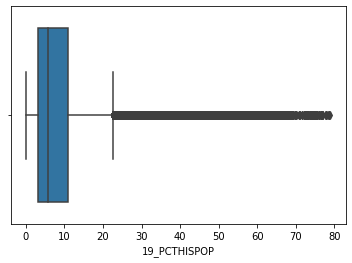

In [ ]:
#Outliers - 2019 Hispanic People Population
sns.boxplot(x=df['19_PCTHISPOP'])
plt.show()

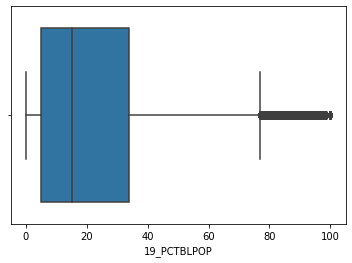

In [ ]:
#Outliers - 2019 Black People Population
sns.boxplot(x=df['19_PCTBLPOP'])
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


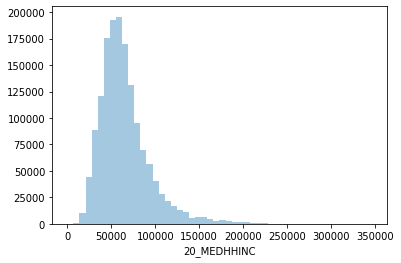

In [ ]:
sns.distplot( a=df["20_MEDHHINC"], hist=True, kde=False, rug=False )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


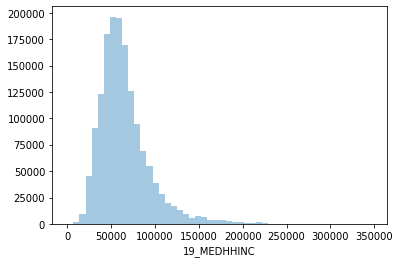

In [ ]:
sns.distplot( a=df["19_MEDHHINC"], hist=True, kde=False, rug=False )
plt.show()

# Modeling

In [ ]:
# # Modeling
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression
# import statsmodels.api as sm

In [ ]:
# # Set up train/test split
# X = df.drop(['MEDHHINC_DIFF_PCT', 'MEDHHINC_DIFF_RAW'], axis=1)
# y = df['MEDHHINC_DIFF_PCT']

In [ ]:
# # Split data into 70% training, 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# # Kitchen sink model
# ks = sm.OLS(y, X)
# ks_res = ks.fit()
# ks_res.summary()

# Linear Modeling

In [ ]:
# Import Library
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Split dataset into X and Y variables
Y = df.MEDHHINC_DIFF_PCT
Y

0          0.002956
1          0.002956
2          0.002956
3          0.002956
4          0.002956
             ...   
1563433    0.014197
1563434    0.011277
1563435    0.007609
1563436    0.007609
1563437    0.007609
Name: MEDHHINC_DIFF_PCT, Length: 1522891, dtype: float64

In [ ]:
X = df.drop(['ZIP_CODE', 'ZIP4', 'MEDHHINC_DIFF_PCT', 'MEDHHINC_DIFF_RAW'], axis=1)
X

,20_POP20,20_HH20,20_POPGROW20,20_AVGHHSIZE,20_MEDAGHHER,20_MEDRENT,20_MEDVALOCC,20_MEDVEHICLE,20_MEDHHINC,20_AVGHHINC,...,19_PCTHISPOP,19_PCTWNHPOP,19_PCTGRADDEG,19_PCTWHCOL,19_PCTSPARC,19_CASH_EDU,19_HEALTHINS,19_MEDHHINC,19_MEDAGHHER,FULL_ZIP
0,96.1,37.6,3.44,2.56,55.1,833,273458,2.6,112632,165748,...,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,270060001
1,58.0,22.7,3.44,2.56,55.1,833,273458,2.6,112632,165748,...,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,270060121
2,81.2,31.7,3.44,2.56,55.1,833,273458,2.6,112632,165748,...,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,270060201
3,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,112632,165748,...,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,270060316
4,77.9,30.4,3.44,2.56,55.1,833,273458,2.6,112632,165748,...,1.78,92.94,23.26,43.95,7.50,83.9,4165.7,112300,54.1,270060476
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563433,2.6,1.1,7.75,2.26,60.4,228,130226,2.4,58149,60923,...,1.86,94.22,9.67,20.30,5.66,30.7,3761.1,57335,60.1,305592385
1563434,2.3,1.0,13.13,2.36,59.7,293,165705,2.6,55691,71248,...,0.90,96.88,4.04,17.35,7.36,41.6,3826.5,55070,59.0,305593096
1563435,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,42243,62745,...,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8,305599000
1563436,1.9,0.8,12.37,2.32,61.8,689,152497,2.5,42243,62745,...,2.94,94.61,8.24,21.25,5.23,34.6,3726.1,41924,60.8,305599200


In [ ]:
# Perform 70/30 data split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
# Data Dimension

In [ ]:
X_train.shape, Y_train.shape

((1066023, 32), (1066023,))

In [ ]:
X_test.shape, Y_test.shape

((456868, 32), (456868,))

In [ ]:
# Linear Regression Model

In [ ]:
# Build linear regression

In [ ]:
# Define the model
model = linear_model.LinearRegression()

In [ ]:
# Build Training Model
model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Apply trained model to make prediction (on test set)
Y_pred = model.predict(X_test)

In [ ]:
# Prediction Results

In [ ]:
# Print Model Performance
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('Mean squared error (MSE): %.6f'
      % mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2): %.6f'
      % r2_score(Y_test, Y_pred))

Coefficients: [-0.00011403  0.00020451  0.00002187 -0.00048265  0.00031854 -0.00000023
 -0.          0.00942693  0.00001414 -0.          0.00000006  0.00346936
 -0.00037851 -0.          0.00011383 -0.00016205  0.00003008 -0.0084644
 -0.00353883  0.00004174 -0.00018309 -0.00006574  0.00008009  0.00021895
 -0.00001882 -0.00006384  0.00008908  0.00017263 -0.00001081 -0.00001416
 -0.00024021  0.        ]
Intercept: 0.01518611404674297
Mean squared error (MSE): 0.000281
Coefficient of determination (R^2): 0.736291


# New Section

# New Section

In [ ]:
# # Jesseca's Model
# from sklearn import metrics
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LinearRegression

In [ ]:
# # Set up train/test split
# X = df.drop(['MEDHHINC_DIFF_PCT', 'MEDHHINC_DIFF_RAW', '20_CRRTTYPE', 'ZIP_CODE','ZIP4', 'Right_ZIP_CODE', 'Right_ZIP4', 'STAABBRV'], axis=1)
# y = df['MEDHHINC_DIFF_PCT']

In [ ]:
# # Split data into 70% training, 30% testing
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Kitchen sink method on scaled data
# Results are to predict change in median household income from 2019-2021

In [ ]:
# import statsmodels.api as sm
# ks = sm.GLSAR(y, X)
# ks_res = ks.fit()
# ks_res.summary()

In [ ]:
df